# Lesson 5: Advanced Geography

In [1]:
import censusdis.data as ced
import censusdis.maps as cem

from censusdis.datasets import ACS5

import censusdis.states as states
from censusdis.places.massachusetts import BOSTON_CITY

from censusdis import CensusApiException

Recall from [Lesson 2: Maps and More Geographies](./Lesson%202%20Maps.ipynb) that some geograpies are on-spine
and others are off-spine.

![Census Geographies](../images/census_geos.png)

## Can we combine on- and off-spine geometries?

What are all the census tracts in Boston, MA (a place)? It seems like a reasonable
question but the geography hierarchy does not technically allow it to be asked.

In [2]:
try:
    df_boston_tracts = ced.download(
        dataset=ACS5,
        vintage=2020,
        download_variables=["NAME"],
        state=states.MA,
        place=BOSTON_CITY,
        tract="*",
    )
except CensusApiException as e:
    print("We caught an exception!", e)

We caught an exception! Unable to match the geography specification {'state': '25', 'place': '07000', 'tract': '*'}.
Supported geographies for dataset='acs/acs5' in year=2020 are:
['us']
['region']
['division']
['state']
['state', 'county']
['state', 'county', 'county_subdivision']
['state', 'county', 'county_subdivision', 'subminor_civil_division']
['state', 'county', 'county_subdivision', 'place_remainder_or_part']
['state', 'county', 'tract']
['state', 'county', 'tract', 'block_group']
['state', 'place', 'county_or_part']
['state', 'place']
['state', 'consolidated_city']
['state', 'consolidated_city', 'place_or_part']
['state', 'alaska_native_regional_corporation']
['american_indian_area_alaska_native_area_hawaiian_home_land']
['american_indian_area_alaska_native_area_hawaiian_home_land', 'tribal_subdivision_remainder']
['american_indian_area_alaska_native_area_reservation_or_statistical_entity_only']
['american_indian_area_off_reservation_trust_land_only_hawaiian_home_land']
['amer

<br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br>

## We can get all tracts in the state of Massachusetts, and the whole of Boston

But we can't get just the tracts in Boston.

In [3]:
gdf_ma_tracts = ced.download(
    dataset=ACS5,
    vintage=2020,
    download_variables=["NAME"],
    with_geometry=True,
    state=states.MA,
    tract="*",
)

gdf_boston = ced.download(
    dataset=ACS5,
    vintage=2020,
    download_variables=["NAME"],
    with_geometry=True,
    state=states.MA,
    place=BOSTON_CITY,
)

In [4]:
gdf_ma_tracts

STATE COUNTY   TRACT                                               NAME  \
0       25    001  012601  Census Tract 126.01, Barnstable County, Massac...   
1       25    001  012602  Census Tract 126.02, Barnstable County, Massac...   
2       25    001  012700  Census Tract 127, Barnstable County, Massachus...   
3       25    001  012800  Census Tract 128, Barnstable County, Massachus...   
4       25    001  012900  Census Tract 129, Barnstable County, Massachus...   
...    ...    ...     ...                                                ...   
1615    25    001  012002  Census Tract 120.02, Barnstable County, Massac...   
1616    25    001  012101  Census Tract 121.01, Barnstable County, Massac...   
1617    25    001  012102  Census Tract 121.02, Barnstable County, Massac...   
1618    25    001  012200  Census Tract 122, Barnstable County, Massachus...   
1619    25    001  012502  Census Tract 125.02, Barnstable County, Massac...   

                                               geometry  
0     POLYGON ((-70.33660 41.65943, -70.33489 41.660...  
1     POLYGON ((-70.31537 41.65111, -70.31227 41.661...  
2     POLYGON ((-70.37554 41.65239, -70.37266 41.652...  
3     POLYGON ((-70.37812 41.69254, -70.37439 41.690...  
4     POLYGON ((-70.39097 41.65624, -70.39099 41.657...  
...                                                 ...  
1615  POLYGON ((-70.22269 41.64955, -70.22193 41.651...  
1616  POLYGON ((-70.27012 41.66030, -70.26593 41.673...  
1617  POLYGON ((-70.27417 41.64796, -70.27363 41.649...  
1618  MULTIPOLYGON (((-70.39115 41.73194, -70.38359 ...  
1619  POLYGON ((-70.32213 41.63143, -70.32065 41.631...  

[1620 rows x 5 columns]

In [5]:
gdf_boston

STATE  PLACE                        NAME  \
0    25  07000  Boston city, Massachusetts   

                                            geometry  
0  MULTIPOLYGON (((-70.93091 42.32160, -70.93025 ...

<br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br>

## Spatial Intersection

**Note:** "All tracts in Boston," is an imperfectly defined problem, since some tracts might
not be entirely inside or outside a place.

We can get a reasonable solution to the problem by asking, "What tracts intersect with Boston?"

Implementation can be complicated:

- Computational geometry with floating point is notoriously finicky. What about intersection
  just at the boundaries? Or slivers created by round-off error?
  - Intersection doesn't quite work.
  - Containment doesn't quite work.

<br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br>

## Illustrating some of the issues

### Intersection

In [6]:
gdf_intersect = gdf_ma_tracts.sjoin(gdf_boston)

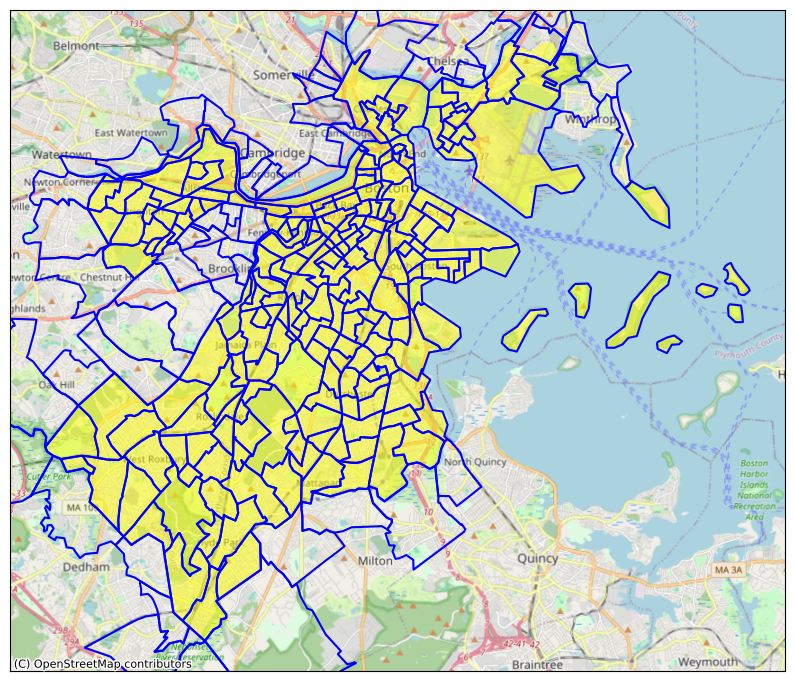

In [7]:
ax = cem.plot_map(
    gdf_boston, color="yellow", alpha=0.5, figsize=(10, 10), with_background=True
)

ax = cem.plot_map(
    gdf_intersect.boundary,
    color="blue",
    ax=ax,
)

<br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br>

### Contained Entirely Within

In [8]:
gdf_within = gdf_ma_tracts.sjoin(gdf_boston, predicate="within")

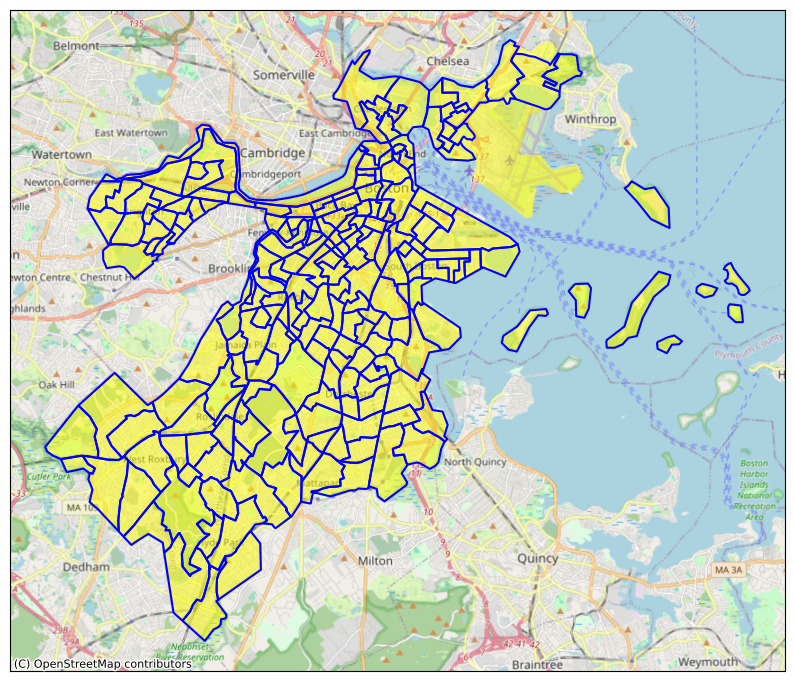

In [9]:
ax = cem.plot_map(
    gdf_boston, color="yellow", alpha=0.5, figsize=(10, 10), with_background=True
)

ax = cem.plot_map(
    gdf_within.boundary,
    color="blue",
    ax=ax,
)

<br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br>

### What about partial containment?

For example, "all tracts of which more than 80% of their area is in Boston?"

This is doable, but the devil is in the details:

- `with_geometry=True` returns geometry in lattitude and longitude.
- We need to project to meters (or feet) to properly compute area.
- The most accurate projection depends on where we are. Alaska and Florida are very different.

<br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br>

## `ced.contained_within`

A flexible API that handles all the details for us.

In [10]:
# We want tracts in Boston

gdf_boston_tracts = ced.contained_within(
    # The containing geometry:
    state=states.MA,
    place=BOSTON_CITY,
).download(
    # Normal `ced.download` args. But only return those in Boston.
    dataset=ACS5,
    vintage=2020,
    download_variables=["NAME"],
    with_geometry=True,
    state=states.MA,
    tract="*",
)

In [11]:
gdf_boston_tracts.head()

STATE  PLACE COUNTY   TRACT  \
0    25  07000    025  000101   
1    25  07000    025  000102   
2    25  07000    025  000201   
3    25  07000    025  000202   
4    25  07000    025  000301   

                                               NAME  \
0  Census Tract 1.01, Suffolk County, Massachusetts   
1  Census Tract 1.02, Suffolk County, Massachusetts   
2  Census Tract 2.01, Suffolk County, Massachusetts   
3  Census Tract 2.02, Suffolk County, Massachusetts   
4  Census Tract 3.01, Suffolk County, Massachusetts   

                                            geometry  
0  POLYGON ((-71.13660 42.36016, -71.13627 42.360...  
1  POLYGON ((-71.16090 42.35863, -71.15399 42.359...  
2  POLYGON ((-71.16764 42.35379, -71.16502 42.353...  
3  POLYGON ((-71.16057 42.35267, -71.15859 42.353...  
4  POLYGON ((-71.17394 42.35340, -71.17139 42.356...

<br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br>

### `ced.contained_within` results

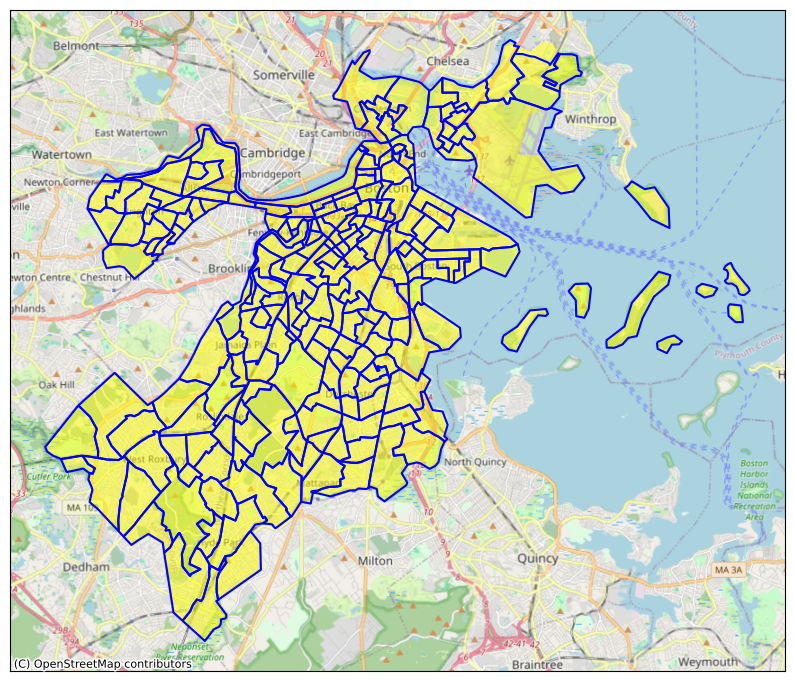

In [12]:
ax = cem.plot_map(
    gdf_boston, color="yellow", alpha=0.5, figsize=(10, 10), with_background=True
)

ax = cem.plot_map(
    gdf_boston_tracts.boundary,
    color="blue",
    with_background=True,
    ax=ax,
)

<br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br>

### Removing water from geometry.

This can make a big different in the appearance of maps for coastal areas.

In [13]:
gdf_boston_tracts_land = ced.contained_within(
    state=states.MA,
    place=BOSTON_CITY,
).download(
    # Normal `ced.download` args. But only return those in Boston.
    dataset=ACS5,
    vintage=2020,
    download_variables=["NAME"],
    with_geometry=True,
    state=states.MA,
    tract="*",
    # Remove are that is water. This slows the query down, but results in better maps.
    remove_water=True,
)

In [14]:
gdf_boston_land = ced.download(
    dataset=ACS5,
    vintage=2020,
    download_variables=["NAME"],
    with_geometry=True,
    state=states.MA,
    place=BOSTON_CITY,
    remove_water=True,
)

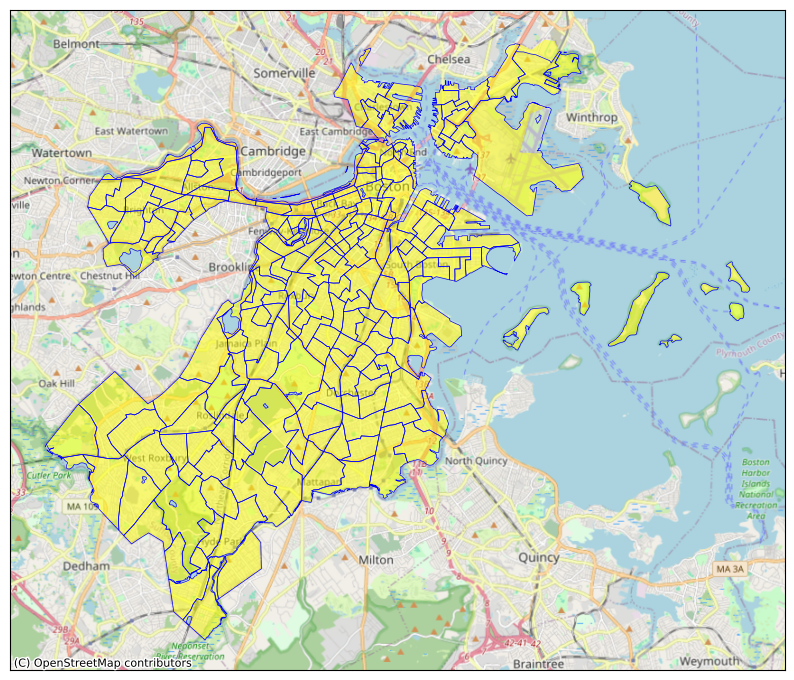

In [15]:
ax = cem.plot_map(
    gdf_boston_land, color="yellow", alpha=0.5, figsize=(10, 10), with_background=True
)

ax = cem.plot_map(
    gdf_boston_tracts_land.boundary,
    color="blue",
    linewidth=0.5,
    ax=ax,
)

<br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br>

## Example 2: Tracts in the New York CSA

In this example, we want to get all the census tracts that are in *any*
Combined Statistical Area (CSA) in the state of Illinois.

It looks simple, but as explained above, there is a lot of complexity
hidden under the hood.

In [16]:
from censusdis.csa import NEW_YORK_NEWARK_NY_NJ_CT_PA_CSA

In [17]:
VARIABLE_MEDIAN_INCOME = "B19013_001E"

In [18]:
%%time

gdf_csa_tract = ced.contained_within(
    combined_statistical_area=NEW_YORK_NEWARK_NY_NJ_CT_PA_CSA,
).download(
    ACS5,
    2020,
    [VARIABLE_MEDIAN_INCOME],
    with_geometry=True,
    state="*",
    tract="*",
)

CPU times: user 2.06 s, sys: 214 ms, total: 2.27 s
Wall time: 8.9 s


In [19]:
gdf_csa_tract.shape

(5777, 6)

In [20]:
gdf_csa_tract.head()

COMBINED_STATISTICAL_AREA STATE COUNTY   TRACT  B19013_001E  \
0                       408    09    001  010101     189219.0   
1                       408    09    001  010102     250001.0   
2                       408    09    001  010201     250001.0   
3                       408    09    001  010202     144766.0   
4                       408    09    001  010300     241827.0   

                                            geometry  
0  POLYGON ((-73.72777 41.10070, -73.71229 41.107...  
1  POLYGON ((-73.66985 41.12309, -73.66864 41.124...  
2  POLYGON ((-73.65501 41.06846, -73.65013 41.070...  
3  POLYGON ((-73.60704 41.05392, -73.60488 41.059...  
4  POLYGON ((-73.66336 41.04169, -73.66221 41.043...

<br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br>

### Plot

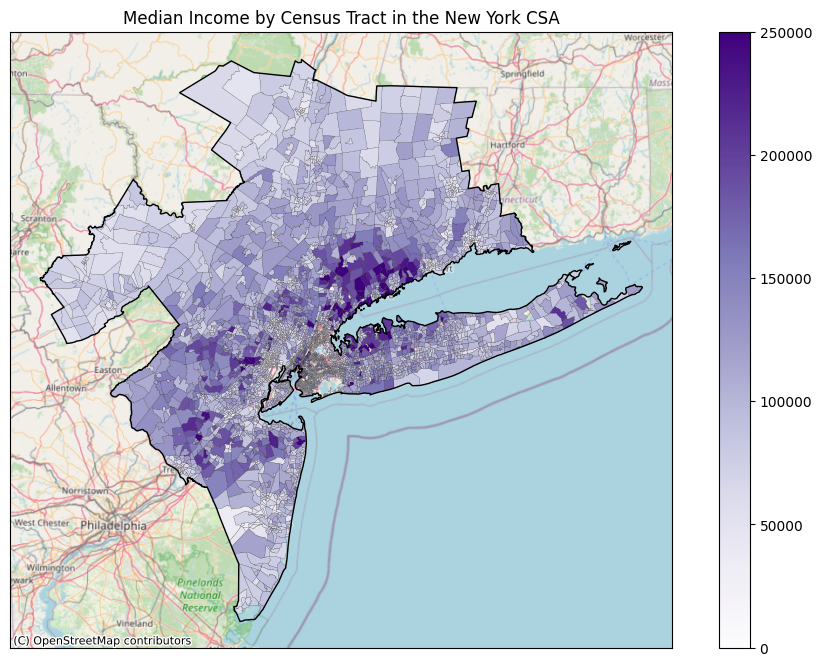

In [21]:
gdf_nyc_csa = ced.download(
    ACS5,
    2020,
    ["NAME"],
    combined_statistical_area=NEW_YORK_NEWARK_NY_NJ_CT_PA_CSA,
    with_geometry=True,
)

ax = cem.plot_map(
    gdf_csa_tract,
    VARIABLE_MEDIAN_INCOME,
    cmap="Purples",
    edgecolor="black",
    linewidth=0.1,
    vmin=0,
    legend=True,
    with_background=True,
    figsize=(12, 8),
)

ax = cem.plot_map(gdf_nyc_csa.boundary, color="black", linewidth=1.0, ax=ax)

_ = ax.set_title("Median Income by Census Tract in the New York CSA")

<br><br><br><br><br><br><br><br>
<br><br><br><br><br><br><br><br>

## Exercise 5

Now it's time to get hands-on and apply what you have learned.
[Exercise 5](../Exercises/Exercise%205.ipynb) is a notebook
where you can work with advanced geographies and `contained_within`.